In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA 

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [3]:
df = pd.read_csv('pitch_cluster.csv')

In [128]:
df.head()

,pitcher,player_name,pitch_type,pitch_name,release_speed,release_spin_rate,pfx_x,pfx_z,movement
0,689017,"Knack, Landon",FF,4-Seam Fastball,94.00,2391.00,-0.44,1.38,1.45
1,689017,"Knack, Landon",FF,4-Seam Fastball,94.40,2401.00,-0.39,1.22,1.28
2,689017,"Knack, Landon",SL,Slider,86.10,2587.00,0.01,-0.23,0.23
3,689017,"Knack, Landon",SL,Slider,85.60,2434.00,0.35,0.13,0.37
4,689017,"Knack, Landon",FF,4-Seam Fastball,94.00,2338.00,-0.33,1.35,1.39


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13736 entries, 0 to 13735
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pitcher            13736 non-null  int64  
 1   player_name        13736 non-null  object 
 2   pitch_type         13736 non-null  object 
 3   pitch_name         13736 non-null  object 
 4   release_speed      13736 non-null  float64
 5   release_spin_rate  13725 non-null  float64
 6   pfx_x              13736 non-null  float64
 7   pfx_z              13736 non-null  float64
 8   movement           13736 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 965.9+ KB


In [130]:
knack = df.loc[df['pitcher'] == 689017]

In [131]:
knack.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 11861
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pitcher            1149 non-null   int64  
 1   player_name        1149 non-null   object 
 2   pitch_type         1149 non-null   object 
 3   pitch_name         1149 non-null   object 
 4   release_speed      1149 non-null   float64
 5   release_spin_rate  1149 non-null   float64
 6   pfx_x              1149 non-null   float64
 7   pfx_z              1149 non-null   float64
 8   movement           1149 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 89.8+ KB


In [132]:
counts = knack['pitch_name'].value_counts()
counts

pitch_name
4-Seam Fastball    532
Slider             256
Curveball          186
Changeup           167
Sweeper              8
Name: count, dtype: int64

In [133]:
pitches = knack[['release_speed','release_spin_rate','pfx_x','pfx_z']]

In [134]:
pitches.head()

,release_speed,release_spin_rate,pfx_x,pfx_z
0,94.00,2391.00,-0.44,1.38
1,94.40,2401.00,-0.39,1.22
2,86.10,2587.00,0.01,-0.23
3,85.60,2434.00,0.35,0.13
4,94.00,2338.00,-0.33,1.35


In [135]:
scaler = StandardScaler()
pitches = pd.DataFrame(scaler.fit_transform(pitches))

In [136]:
pitches.head()

,0,1,2,3
0,1.09,-0.19,-0.35,0.60
1,1.16,-0.16,-0.27,0.45
2,-0.33,0.35,0.40,-0.94
3,-0.42,-0.07,0.96,-0.60
4,1.09,-0.34,-0.17,0.57


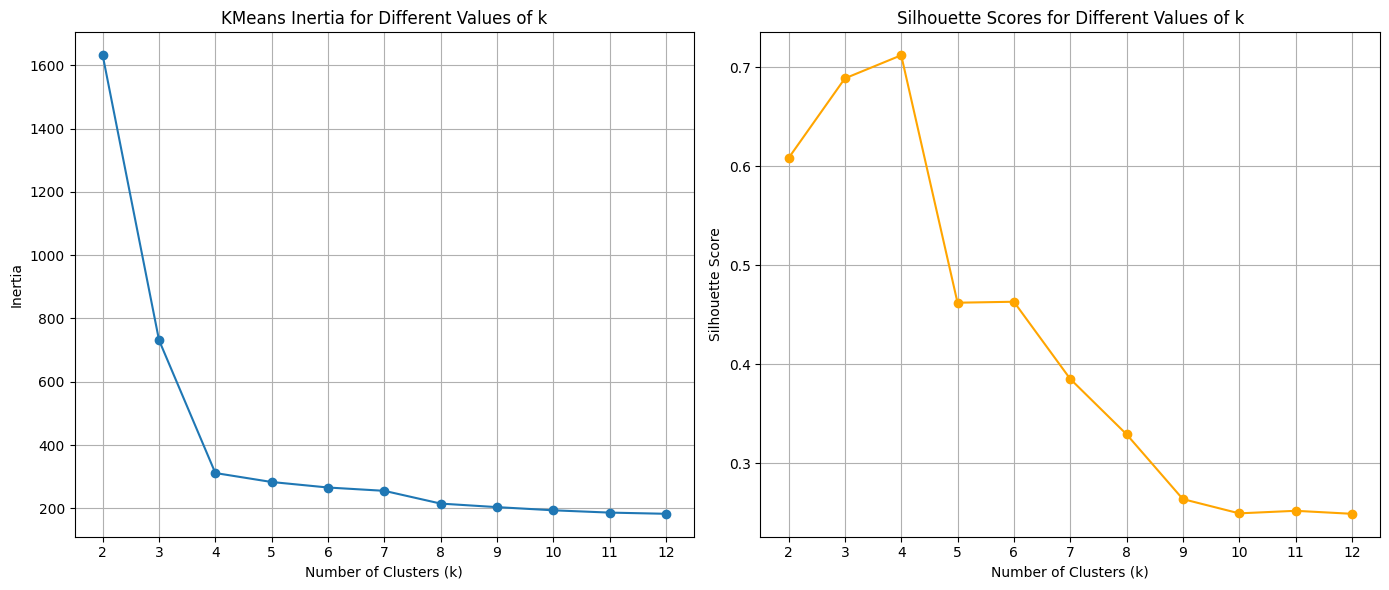

In [137]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(pitches)

    sil_score = silhouette_score(pitches, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [138]:
kmeans = KMeans(n_clusters=4)

In [139]:
kmeans.fit(pitches)

KMeans(n_clusters=4)

In [140]:
clusters = kmeans.predict(pitches)

In [141]:
pitches["Cluster"] = clusters

In [142]:
pitches.sample(10)

,0,1,2,3,Cluster
634,-0.73,-1.99,-0.68,0.51,3
1066,-0.32,0.60,0.73,-0.29,1
1048,1.00,0.11,-0.80,0.91,0
614,-1.58,1.45,1.79,-2.19,2
966,0.89,0.09,-0.48,0.98,0
44,-0.69,-2.41,-1.11,-0.32,3
30,-0.37,-2.54,-1.18,-0.24,3
121,-1.45,1.08,1.49,-1.81,2
341,0.93,0.14,-0.63,0.76,0
178,1.16,0.30,-0.71,0.94,0


In [143]:
pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

In [144]:
PCs_1d = pd.DataFrame(pca_1d.fit_transform(pitches.drop(["Cluster"], axis=1)))
PCs_2d = pd.DataFrame(pca_2d.fit_transform(pitches.drop(["Cluster"], axis=1)))
PCs_3d = pd.DataFrame(pca_3d.fit_transform(pitches.drop(["Cluster"], axis=1)))

In [145]:
PCs_1d.columns = ["PC1_1d"]
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [146]:
pitches = pd.concat([pitches,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [147]:
pitches["dummy"] = 0

In [148]:
cluster0 = pitches[pitches["Cluster"] == 0]
cluster1 = pitches[pitches["Cluster"] == 1]
cluster2 = pitches[pitches["Cluster"] == 2]
cluster3 = pitches[pitches["Cluster"] == 3]

In [149]:
init_notebook_mode(connected=True)

In [150]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    #marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    #marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    #marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [151]:
pitches.sample()

,0,1,2,3,Cluster,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d,dummy
996,0.64,-0.03,-0.56,0.85,0,1.10,1.10,0.43,1.10,0.43,-0.01,0


In [152]:
df.head(20)

,pitcher,player_name,pitch_type,pitch_name,release_speed,release_spin_rate,pfx_x,pfx_z,movement
0,689017,"Knack, Landon",FF,4-Seam Fastball,94.00,2391.00,-0.44,1.38,1.45
1,689017,"Knack, Landon",FF,4-Seam Fastball,94.40,2401.00,-0.39,1.22,1.28
2,689017,"Knack, Landon",SL,Slider,86.10,2587.00,0.01,-0.23,0.23
3,689017,"Knack, Landon",SL,Slider,85.60,2434.00,0.35,0.13,0.37
4,689017,"Knack, Landon",FF,4-Seam Fastball,94.00,2338.00,-0.33,1.35,1.39
5,689017,"Knack, Landon",FF,4-Seam Fastball,93.50,2105.00,-0.35,0.93,0.99
6,689017,"Knack, Landon",ST,Sweeper,85.70,2547.00,0.53,-0.04,0.53
7,689017,"Knack, Landon",SL,Slider,84.70,2435.00,0.24,-0.29,0.38
8,689017,"Knack, Landon",CU,Curveball,79.20,2937.00,0.78,-0.67,1.03
9,689017,"Knack, Landon",FF,4-Seam Fastball,93.20,2119.00,-0.49,1.25,1.34


In [153]:
pitches.head(20)

,0,1,2,3,Cluster,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d,dummy
0,1.09,-0.19,-0.35,0.60,0,1.12,1.12,0.56,1.12,0.56,0.24,0
1,1.16,-0.16,-0.27,0.45,0,1.01,1.01,0.61,1.01,0.61,0.26,0
2,-0.33,0.35,0.40,-0.94,1,-1.04,-1.04,-0.03,-1.04,-0.03,-0.22,0
3,-0.42,-0.07,0.96,-0.60,1,-1.04,-1.04,-0.28,-1.04,-0.28,0.51,0
4,1.09,-0.34,-0.17,0.57,0,1.06,1.06,0.47,1.06,0.47,0.44,0
5,1.00,-0.98,-0.20,0.17,0,1.06,1.06,-0.15,1.06,-0.15,0.49,0
6,-0.41,0.24,1.26,-0.76,1,-1.41,-1.41,-0.02,-1.41,-0.02,0.58,0
7,-0.59,-0.07,0.78,-1.00,1,-1.24,-1.24,-0.47,-1.24,-0.47,0.18,0
8,-1.58,1.31,1.68,-1.36,2,-2.95,-2.95,0.06,-2.95,0.06,0.04,0
9,0.95,-0.94,-0.43,0.48,0,1.32,1.32,-0.13,1.32,-0.13,0.38,0
